**Problem Statement:**

 A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\poovi\Downloads\Micro-Credit-Project--1-\Micro Credit Project\Data file.csv")
df.head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [3]:
df.shape

(209593, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
#checking the values counts od each variable
collist = df.columns.values

for i in collist:
    print(f"Value count of {i} is \n {df[i].value_counts()}\n")

Value count of Unnamed: 0 is 
 1         1
139733    1
139723    1
139724    1
139725    1
         ..
69869     1
69870     1
69871     1
69872     1
209593    1
Name: Unnamed: 0, Length: 209593, dtype: int64

Value count of label is 
 1    183431
0     26162
Name: label, dtype: int64

Value count of msisdn is 
 04581I85330    7
47819I90840    7
30080I90588    6
55809I89238    6
22038I88658    6
              ..
36902I90840    1
17447I88689    1
59686I90584    1
00504I91190    1
65061I85339    1
Name: msisdn, Length: 186243, dtype: int64

Value count of aon is 
 95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
977092.351997      1
645851.038396      1
881623.815396      1
555267.797667      1
811881.372822      1
Name: aon, Length: 4507, dtype: int64

Value count of daily_decr30 is 
 0.000000        4144
500.000000       829
1000.000000      569
700.000000       381
600.000000       354
                ... 
3

In [6]:
#checking for null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There is no null values in our dataset

In [7]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

'Unnamed: 0','pcircle' has all same value so it will not contribute much in model prediction, it can be dropped. 'msidn' also has more unique values which does not contribute in model prediction, it can also be dropped.

In [8]:
df = df.drop(['Unnamed: 0','pcircle','msisdn'],axis=1)

In [9]:
df.duplicated().sum()

31

There is 31 duplicates in dataset, which can be dropped

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

###### Checking for categorical columns

In [12]:
col = df.columns
num_col = df._get_numeric_data().columns

cat_col = list(set(col)-set(num_col))
cat_col

['pdate']

let's convert 'pdate' to datetime format

In [13]:
df['pdate'] = pd.to_datetime(df['pdate'])

In [14]:
df.shape

(209562, 34)

we can observe that date is taken from year 2016 

In [15]:
day = df.pdate.dt.day.to_frame()
month = df.pdate.dt.month.to_frame()

date = day.join(month,how='right',lsuffix='_day',rsuffix='_month')
df = df.join(date,how='left')
df.drop("pdate",inplace=True,axis=1)


In [16]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


In [17]:
col = df.columns
num_col = df._get_numeric_data().columns
num_col

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pdate_day', 'pdate_month'],
      dtype='object')

#### Key Observation:

1. label- Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
2. msisdn- mobile number of user
3. aon- age on cellular network in days
4. daily_decr30- Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
5. daily_decr90- Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
6. rental30- Average main account balance over last 30 days (Unsure of given definition)
7. rental90- Average main account balance over last 90 days (Unsure of given definition)
8. last_rech_date_ma- Number of days till last recharge of main account
9. last_rech_date_da- Number of days till last recharge of data account
10. last_rech_amt_ma- Amount of last recharge of main account (in Indonesian Rupiah)
11. cnt_ma_rech30- Number of times main account got recharged in last 30 days
12. fr_ma_rech30- Frequency of main account recharged in last 30 days Unsure of given definition
13. sumamnt_ma_rech30- Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
14. medianamnt_ma_rech30- Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
15. medianmarechprebal30- Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
16. cnt_ma_rech90- Number of times main account got recharged in last 90 days
17. fr_ma_rech90- Frequency of main account recharged in last 90 days Unsure of given definition
18. sumamnt_ma_rech90- Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
19. medianamnt_ma_rech90- Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
20. medianmarechprebal90- Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
21. cnt_da_rech30- Number of times data account got recharged in last 30 days
22. fr_da_rech30- Frequency of data account recharged in last 30 days
23.cnt_da_rech90- Number of times data account got recharged in last 90 days
24. fr_da_rech90- Frequency of data account recharged in last 90 days
25. cnt_loans30- Number of loans taken by user in last 30 days
26. amnt_loans30- Total amount of loans taken by user in last 30 days
27. maxamnt_loans30- maximum amount of loan taken by the user in last 30 days There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively
28. medianamnt_loans30- Median of amounts of loan taken by the user in last 30 days
29. cnt_loans90- Number of loans taken by user in last 90 days
30. amnt_loans90- Total amount of loans taken by user in last 90 days
31. maxamnt_loans90- maximum amount of loan taken by the user in last 90 days
32. medianamnt_loans90- Median of amounts of loan taken by the user in last 90 days
33. payback30- Average payback time in days over last 30 days
34. payback90- Average payback time in days over last 90 days
35. pcircle- telecom circle
36. mpdate- date

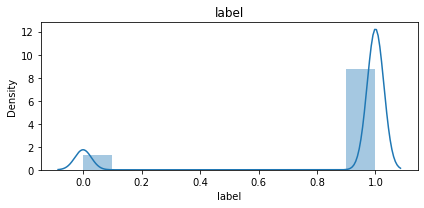

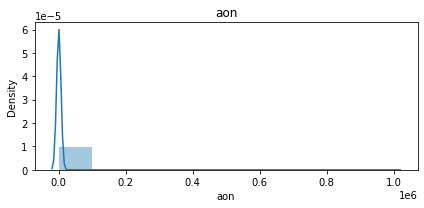

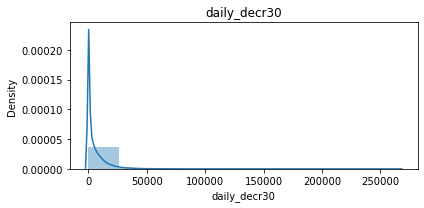

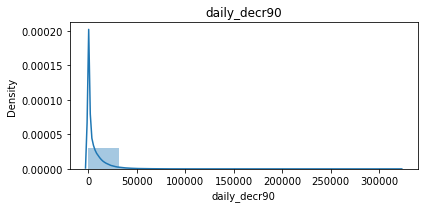

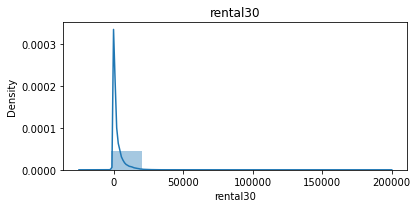

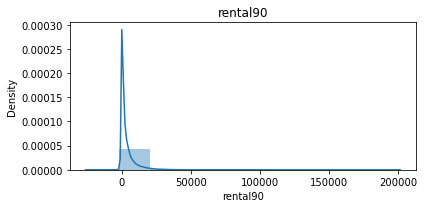

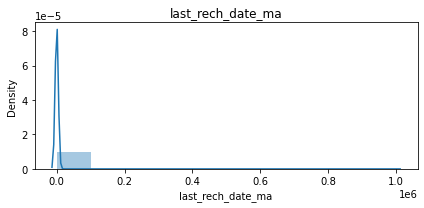

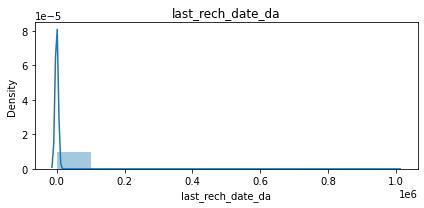

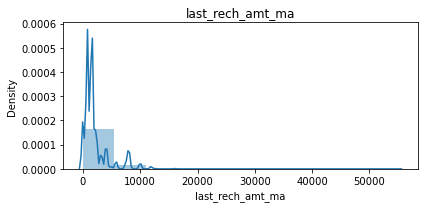

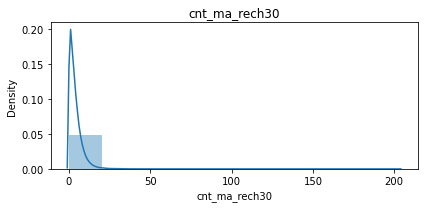

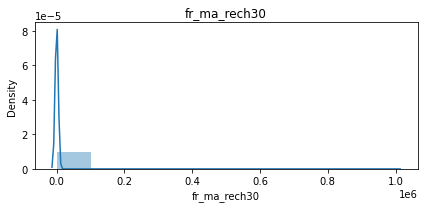

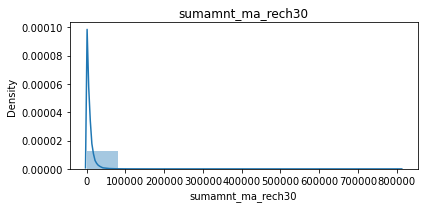

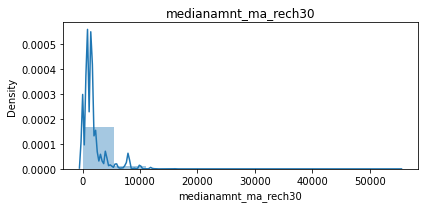

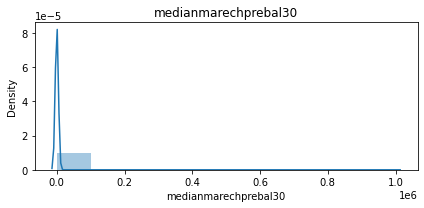

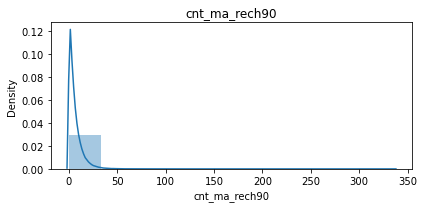

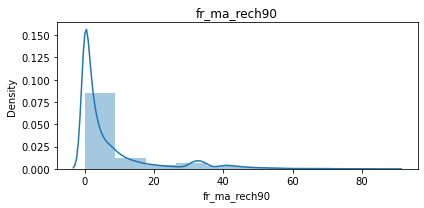

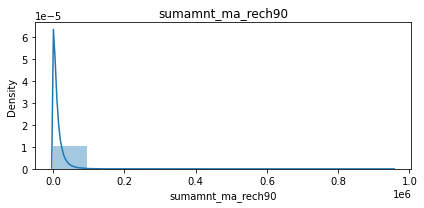

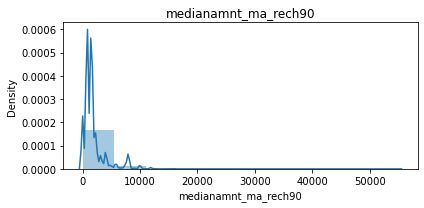

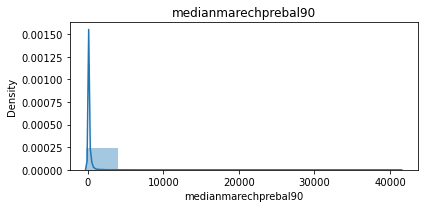

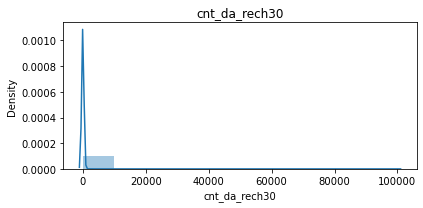

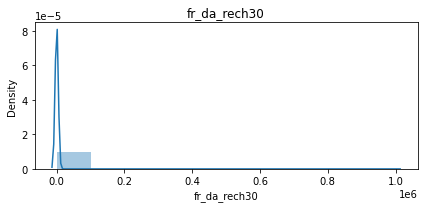

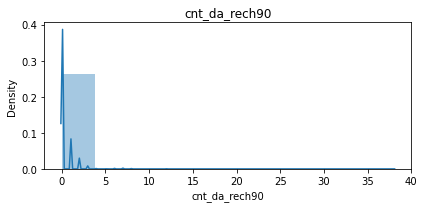

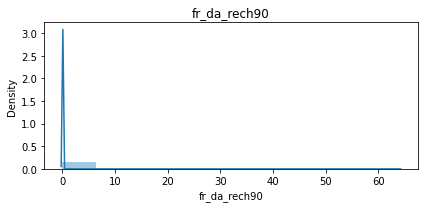

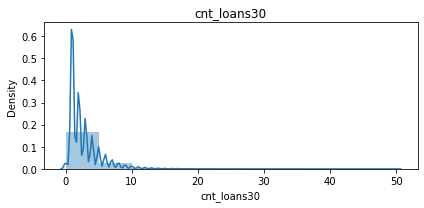

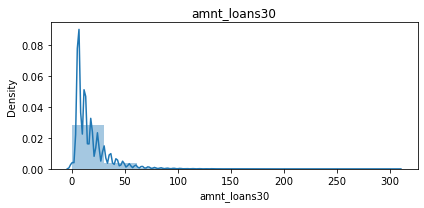

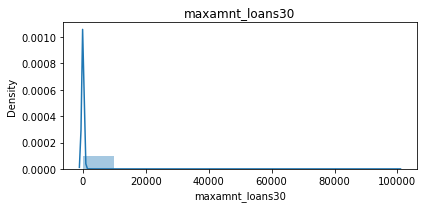

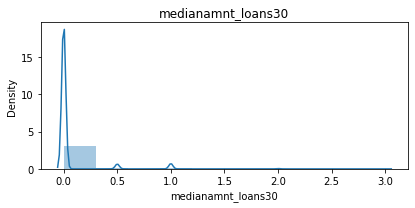

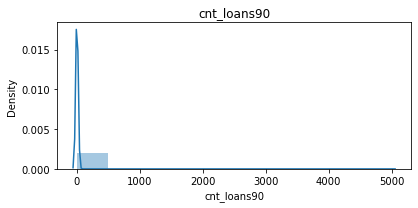

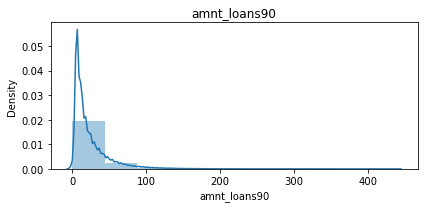

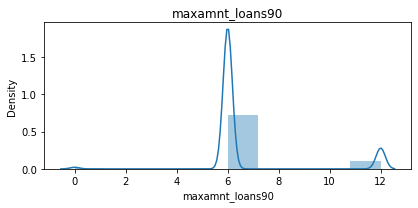

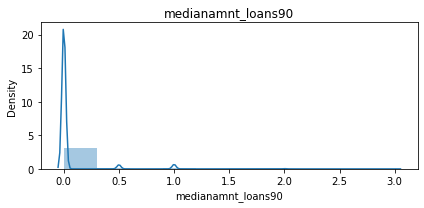

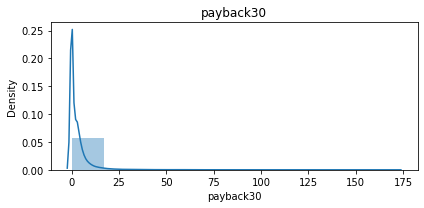

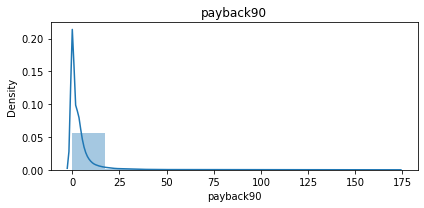

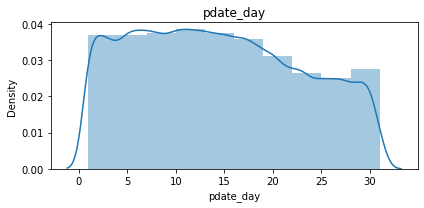

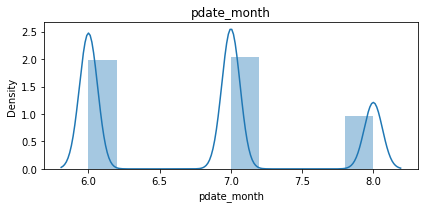

In [18]:
for i in df[num_col]:
    plt.figure(figsize=(6,3))
    sns.distplot(df[i],bins=10)
    plt.title(i)
    plt.tight_layout()
    plt.show()

#### Key Observation:

1. Most of our columns are extremely right skewed.
2. maxamnt_loans90 have only three values 6, 12, 0 and 6 is in the most of the record.
3. For fr_ma_rech90 the frequency of recharge in last 90 days the frequency is very lesser i.e. most of the people are recharging in very lesser time.
4. aon age on cellular network in days most of the people are actually lesser in age on cellular network.
5. rental90, rental90, average main balance over last 90, 30 days are mostly between 0 - 1500.

In [19]:
df['label'].value_counts()

1    183429
0     26133
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

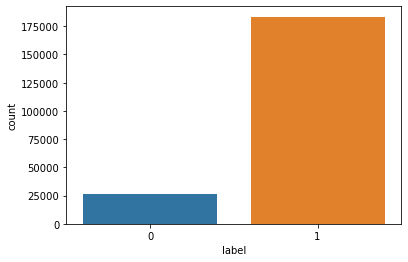

In [20]:
sns.countplot(x='label',data=df)

Here we have large number of 1's which means the dataset is not balanced

In [21]:
df.shape

(209562, 35)

In [22]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
count,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,...,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000
mean,0.875297,8113.512796,5382.170031,6083.386523,2692.964058,3483.905668,3756.403389,3712.752058,2064.754512,3.978622,...,274.698489,0.054037,18.523497,23.647923,6.703238,0.046084,3.399125,4.321920,14.399514,6.797406
std,0.330383,75701.620014,9221.086606,10919.382966,4308.784971,5770.737718,53909.859829,53378.762010,2370.831005,4.256138,...,4245.577376,0.218054,224.813949,26.470977,2.104003,0.200706,8.813867,10.308399,8.438943,0.741434
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,1.000000,246.000000,42.480000,42.713250,280.800000,300.370000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,6.000000
50%,1.000000,527.000000,1470.465667,1500.000000,1083.940000,1334.400000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.000000,7.000000
75%,1.000000,982.000000,7246.000000,7804.000000,3357.452500,4202.537500,7.000000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.000000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.000000,8.000000


##### Key Observations:

1. From the above data it is clear that the data has no null values as mentioned in the Data_Description
2. Catogorical Columns:
    1. label
3. Continous Data Columns:
    1. Remaining all 31 Columns are continous data,
    2. There is large difference between 75% percentile and max Values which is it has more outliers.
    3. Mean is greater than median which also means data have outliers present lets visualize them and lty to figureout a way to remove outliers and skewness in th data.

#### Correlation

In [23]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
label,1.000000,-0.003825,0.168174,0.166034,0.057886,0.075339,0.003705,0.001687,0.131558,0.237120,...,0.000225,0.044521,0.004707,0.199649,0.084064,0.035681,0.048213,0.049050,0.006630,0.154707
aon,-0.003825,1.000000,0.001096,0.000366,-0.000969,-0.000799,0.001691,-0.001694,0.004243,-0.003162,...,-0.002765,0.004660,-0.000612,-0.002329,-0.001196,0.002767,0.001936,0.002199,0.000655,-0.001875
daily_decr30,0.168174,0.001096,1.000000,0.977703,0.442038,0.458950,0.000481,-0.001641,0.275787,0.451347,...,-0.000033,-0.011631,0.008956,0.563473,0.400184,-0.037325,0.026891,0.047148,0.006437,0.518648
daily_decr90,0.166034,0.000366,0.977703,1.000000,0.434658,0.471705,0.000903,-0.001892,0.264082,0.426670,...,0.000020,-0.005611,0.009440,0.567182,0.397237,-0.034705,0.019377,0.040775,-0.021549,0.539398
rental30,0.057886,-0.000969,0.442038,0.434658,1.000000,0.955235,-0.001101,0.003255,0.127204,0.233281,...,-0.000870,-0.016505,0.004005,0.298902,0.234190,-0.035510,0.072942,0.095114,0.036494,0.365665
rental90,0.075339,-0.000799,0.458950,0.471705,0.955235,1.000000,-0.001694,0.002788,0.121351,0.230199,...,-0.001417,-0.009488,0.005134,0.327397,0.251008,-0.034143,0.067083,0.099473,0.008898,0.429382
last_rech_date_ma,0.003705,0.001691,0.000481,0.000903,-0.001101,-0.001694,1.000000,0.001790,-0.000156,0.004302,...,0.000928,0.001833,-0.000226,0.000863,-0.001126,0.002768,-0.002235,-0.001586,0.000556,-0.001215
last_rech_date_da,0.001687,-0.001694,-0.001641,-0.001892,0.003255,0.002788,0.001790,1.000000,-0.000158,0.001540,...,0.000502,0.000059,-0.000973,0.000512,0.001520,-0.002241,0.000075,0.000414,0.000626,-0.001808
last_rech_amt_ma,0.131558,0.004243,0.275787,0.264082,0.127204,0.121351,-0.000156,-0.000158,1.000000,-0.002778,...,0.000992,0.028341,0.000083,0.013985,0.148427,0.020976,-0.027408,-0.014304,0.028825,0.096832
cnt_ma_rech30,0.237120,-0.003162,0.451347,0.426670,0.233281,0.230199,0.004302,0.001540,-0.002778,1.000000,...,0.000101,-0.067048,0.014694,0.685232,0.174072,-0.071486,0.043565,0.017304,0.068582,0.156061


<AxesSubplot:>

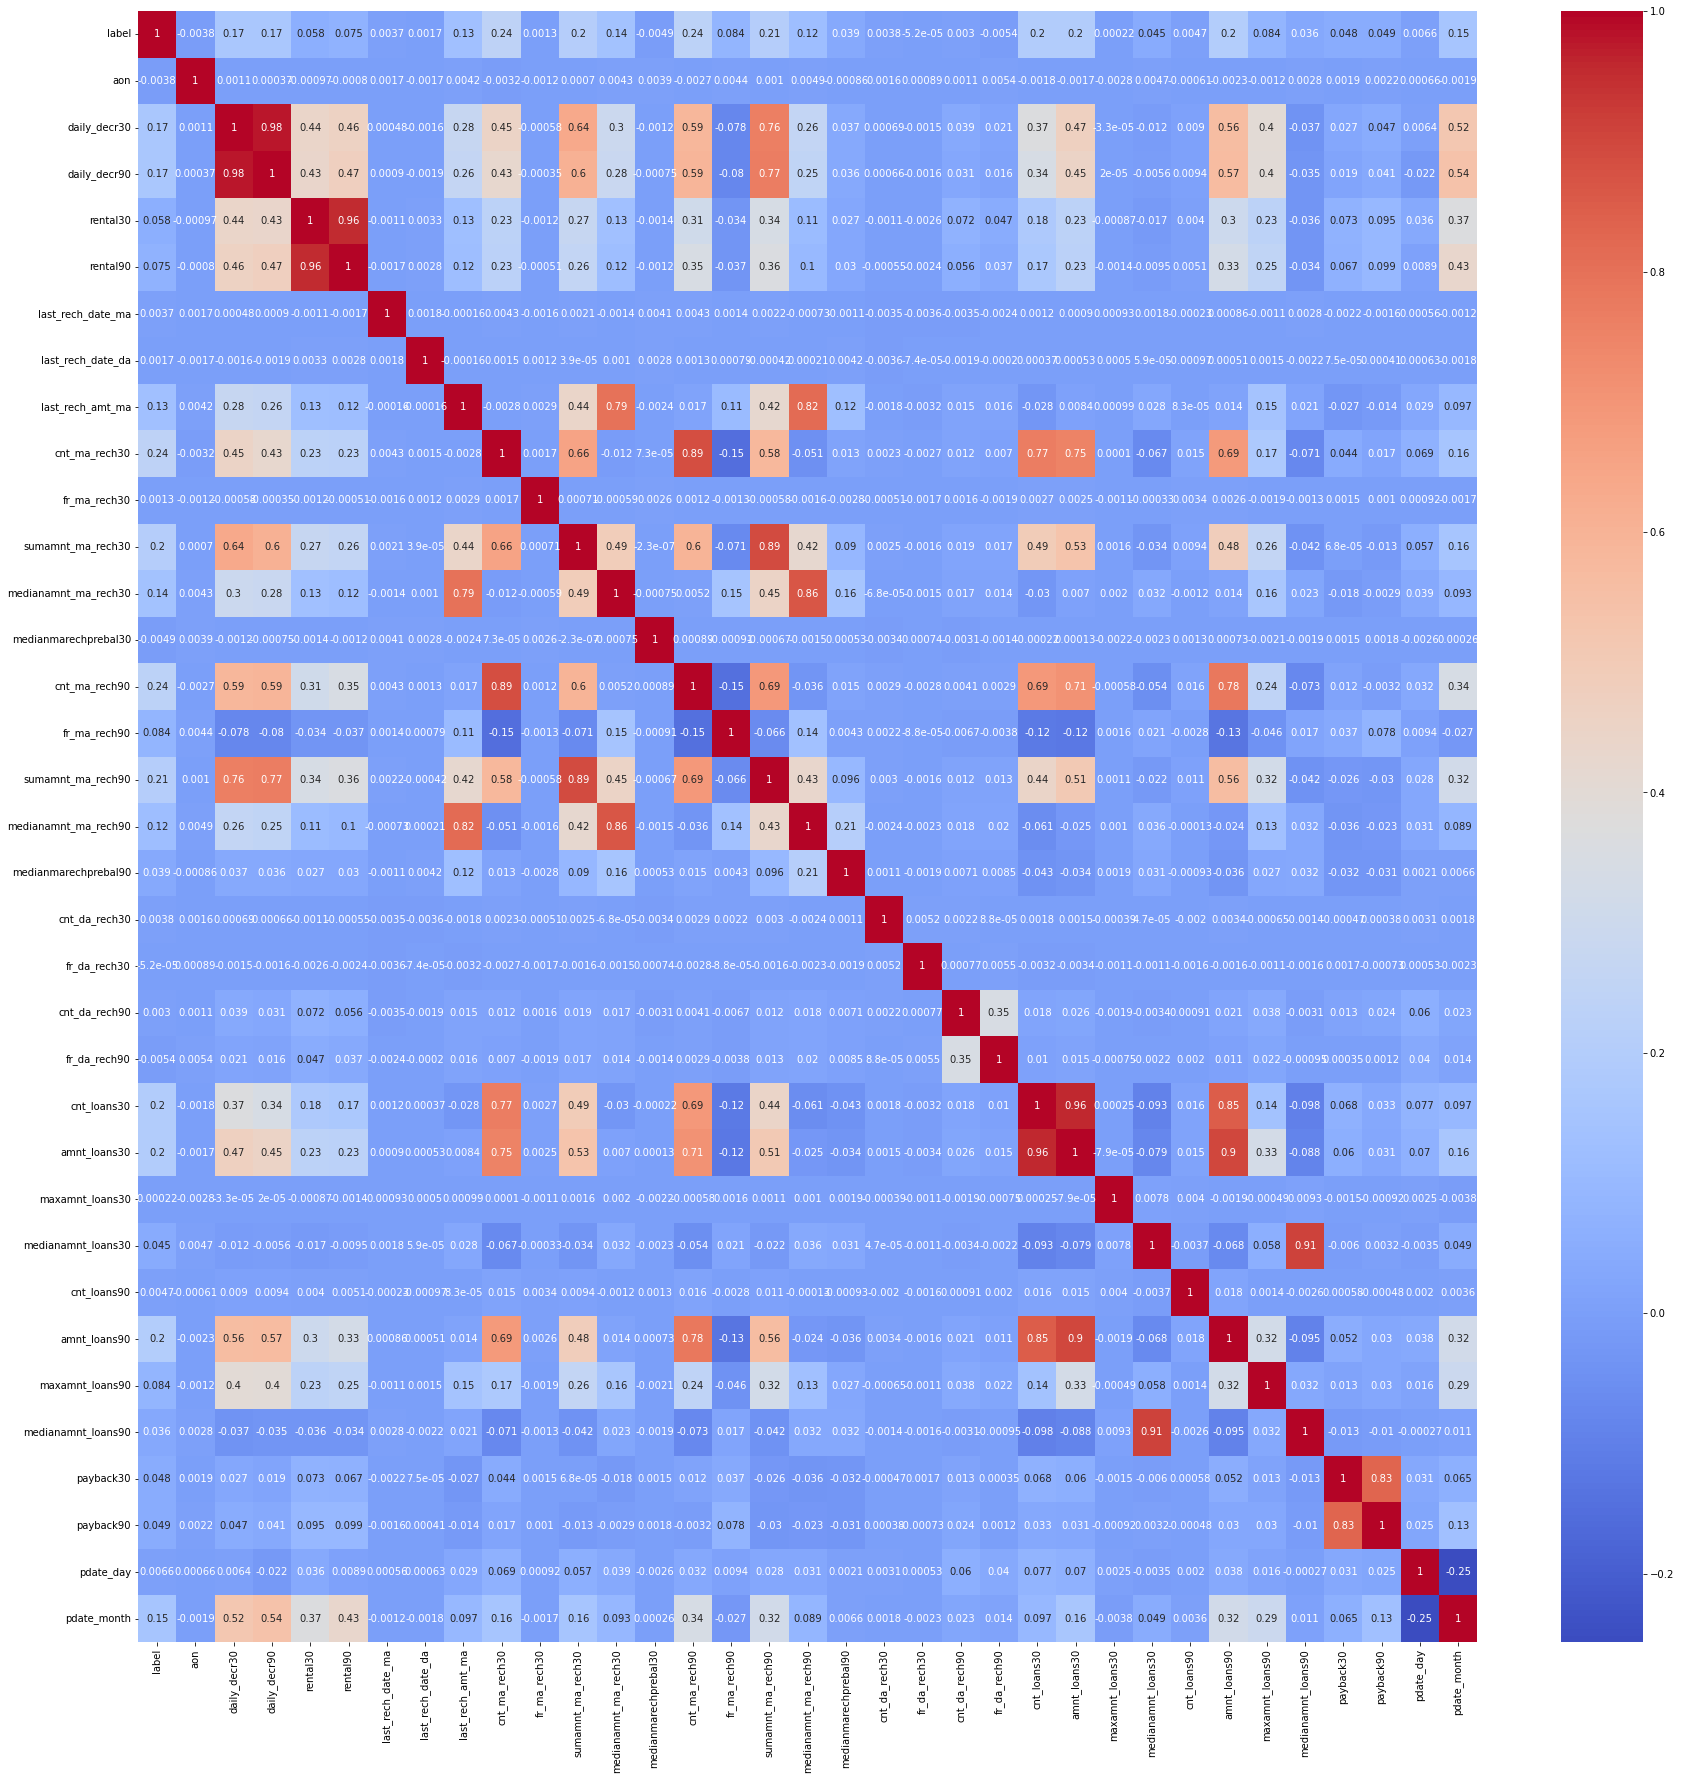

In [24]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

#### Key Observations:

1. There are many multicollinearity issuse in the dataset.
2. amnt_loans90,cnt_loans90,amnt_loans30,sumamnt_ma_rech30 columns have high multicollinearity issues.
3. We can understand that these values have less importance towards the model inference. Let us proceed by dropping these columns from the dataset

Text(0.5, 1.0, 'Correlation with target variable')

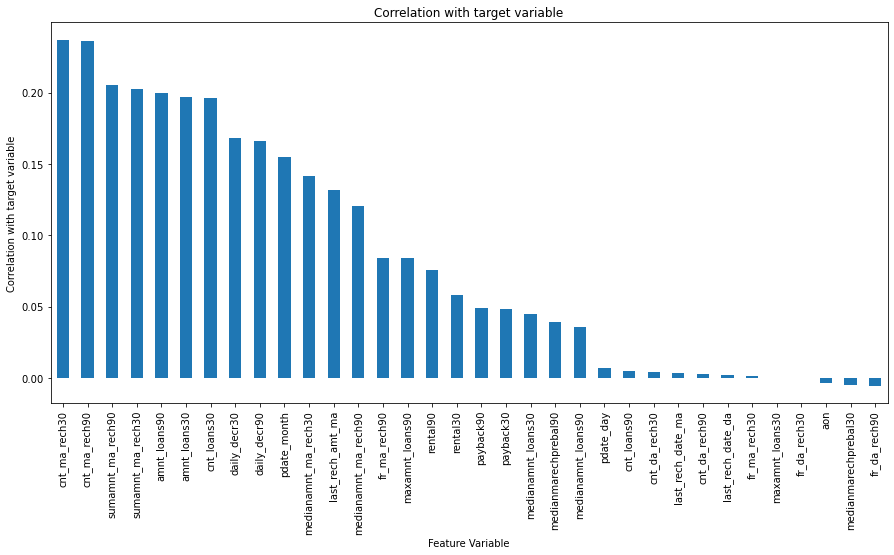

In [25]:
plt.figure(figsize=(15,7))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot.bar()
plt.xlabel("Feature Variable")
plt.ylabel("Correlation with target variable")
plt.title("Correlation with target variable")

#### Key Observations:

1. 'cnt_ma_rech30', 'cnt_ma_reach90' are highly correlated with the target column, whereas 'fr_da_rech90' is less correlated with target column.

### Skewness:

In [26]:
df.skew()

label                   -2.271915
aon                     10.392159
daily_decr30             3.945997
daily_decr90             4.252312
rental30                 4.521743
rental90                 4.437471
last_rech_date_ma       14.789865
last_rech_date_da       14.813747
last_rech_amt_ma         3.781206
cnt_ma_rech30            3.283935
fr_ma_rech30            14.771725
sumamnt_ma_rech30        6.386845
medianamnt_ma_rech30     3.512361
medianmarechprebal30    14.778767
cnt_ma_rech90            3.425285
fr_ma_rech90             2.285206
sumamnt_ma_rech90        4.897896
medianamnt_ma_rech90     3.752792
medianmarechprebal90    44.877678
cnt_da_rech30           17.817034
fr_da_rech30            14.775322
cnt_da_rech90           27.265281
fr_da_rech90            28.985932
cnt_loans30              2.713259
amnt_loans30             2.975560
maxamnt_loans30         17.656733
medianamnt_loans30       4.550661
cnt_loans90             16.593169
amnt_loans90             3.149830
maxamnt_loans9

Skewness is present in almost all columns

In [27]:
x = df.drop(['label'],axis=1)
y = df['label']

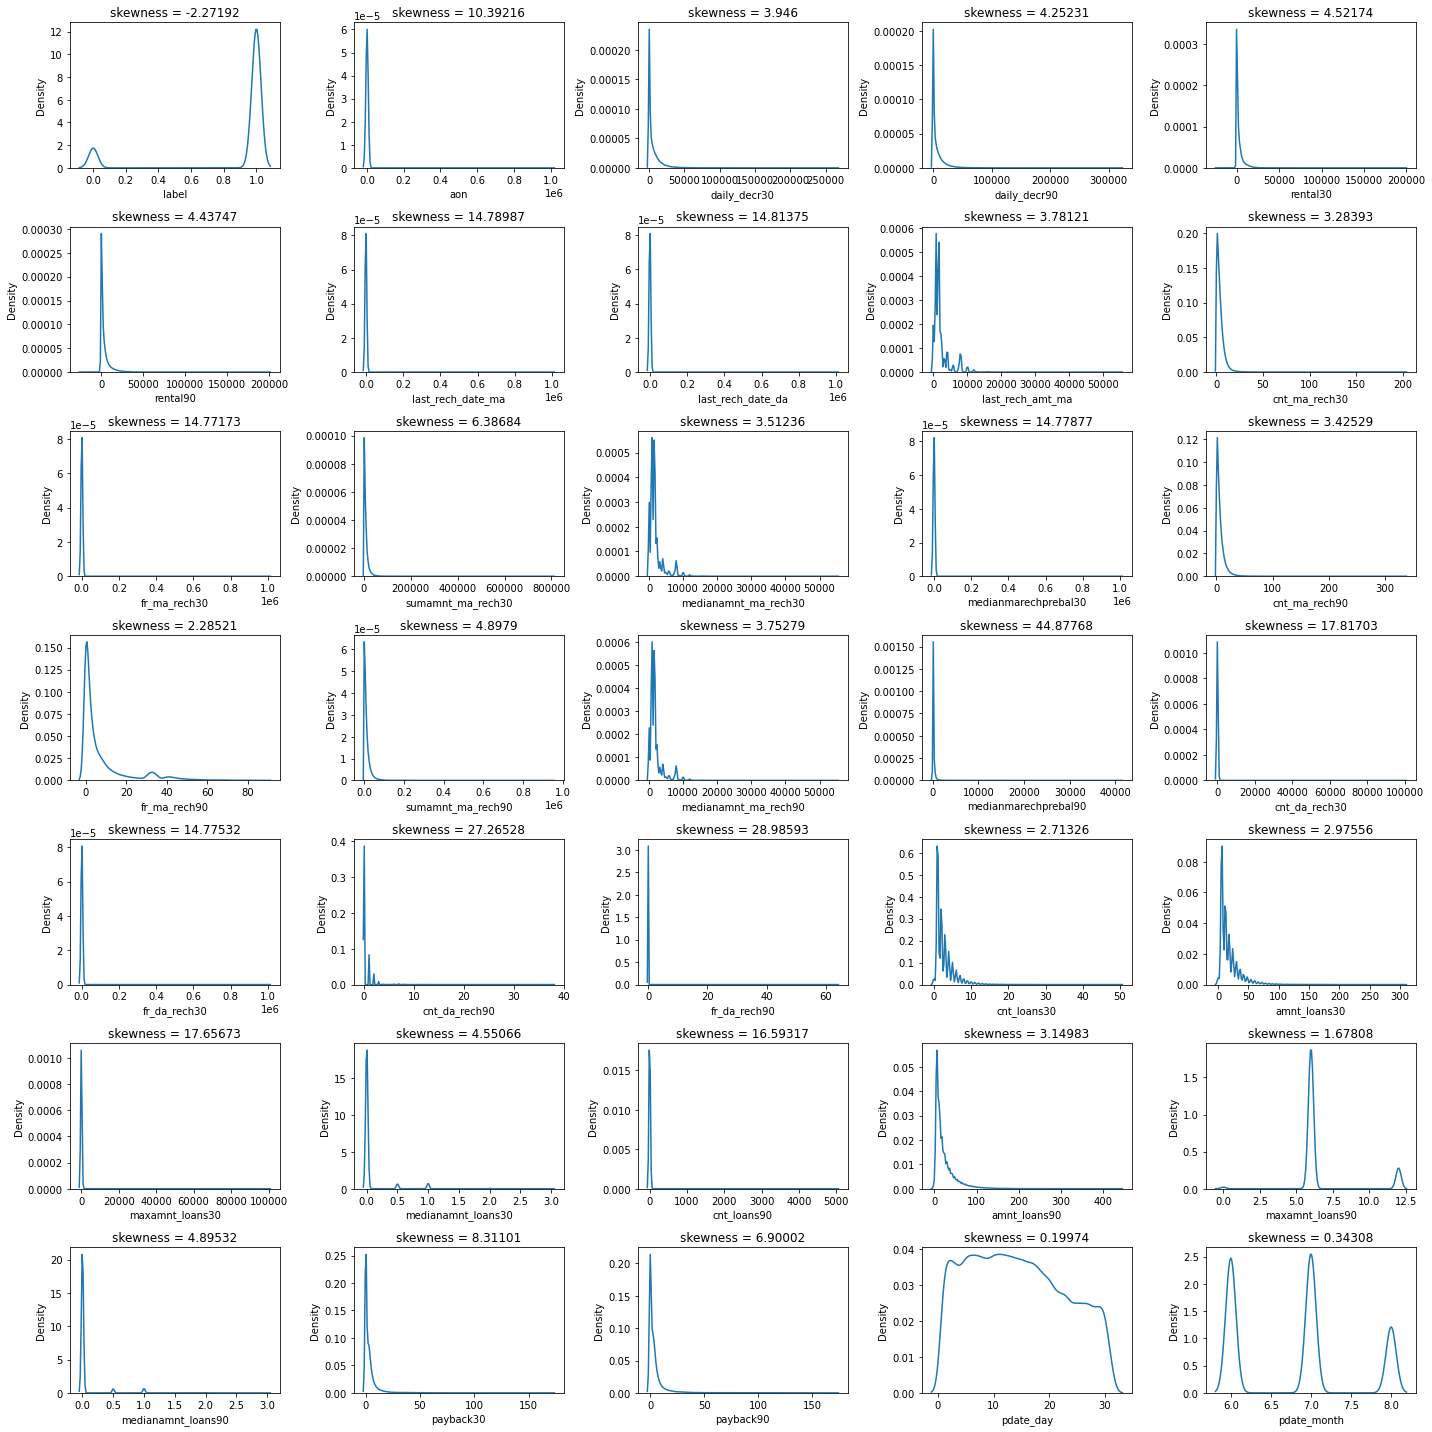

In [28]:
collist = df.columns.values
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(7,5,i+1)
    sns.kdeplot(df[collist[i]])
    plt.title(f"skewness = {round(df[collist[i]].skew(),5)}")
    plt.tight_layout()

#### Removing Skewness

In [29]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')

In [30]:
pd.DataFrame(x_new).skew().sort_values(ascending=True)

6    -106.598292
2      -7.076134
1      -6.578784
5      -5.361687
24     -1.679963
3      -1.020249
4      -0.960237
10     -0.290988
15     -0.191753
11     -0.189169
32     -0.156104
12     -0.118247
7      -0.060722
16     -0.044012
27     -0.008978
13     -0.002459
8      -0.000146
23      0.001967
22      0.036224
33      0.076363
26      0.105503
14      0.142864
9       0.164892
31      0.210764
30      0.298419
28      0.364245
0       1.654672
25      3.447419
29      3.779262
20      6.006096
18      6.925277
17      7.507637
19     11.389804
21     15.468542
dtype: float64

In [31]:
x = pd.DataFrame((x_new),columns=x.columns)

### Detecting Outliers

label                      AxesSubplot(0.125,0.787927;0.133621x0.0920732)
aon                     AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
daily_decr30             AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
daily_decr90            AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
rental30                AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
rental90                   AxesSubplot(0.125,0.677439;0.133621x0.0920732)
last_rech_date_ma       AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
last_rech_date_da        AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
last_rech_amt_ma        AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
cnt_ma_rech30           AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
fr_ma_rech30               AxesSubplot(0.125,0.566951;0.133621x0.0920732)
sumamnt_ma_rech30       AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
medianamnt_ma_rech30     AxesSubplot(0.44569,0.566951;0.133621x0.0920732)
medianmarechprebal30    AxesSubplot(0.

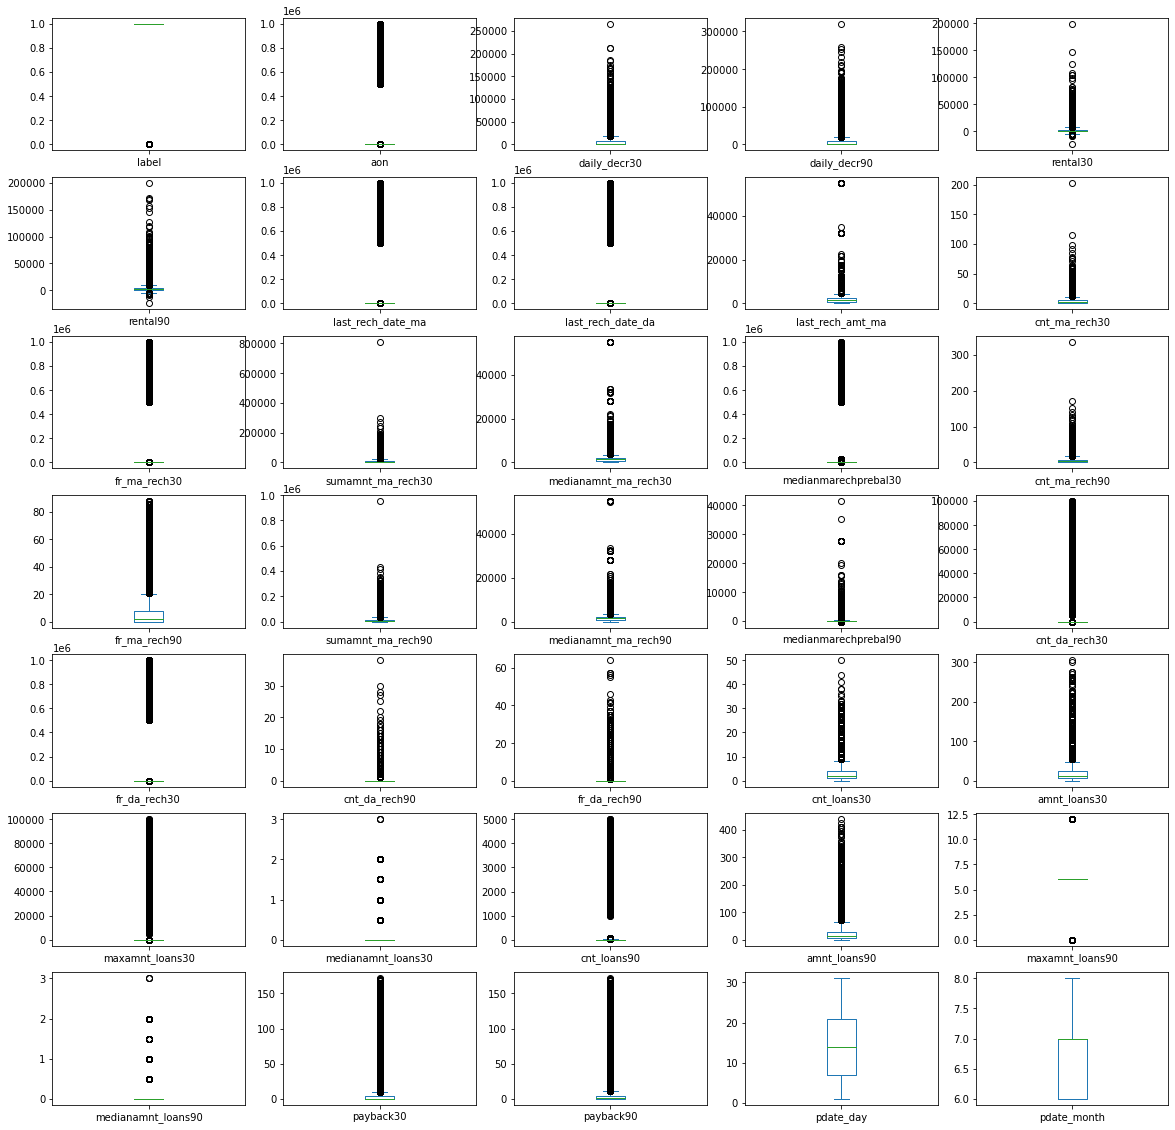

In [32]:
df.plot(kind='box',subplots='True',layout=(7,5),figsize=(20,20))

#### Key Observation:

Outliers is present in almost all columns.

#### Removing Outliers:

In [33]:
from scipy.stats import zscore

z = np.abs(zscore(x))
threshold=3
x_new = x[(z<3).all(axis=1)]

In [34]:
print("Old DataFrame : ",x.shape)
print("New DataFrame : ",x_new.shape)
print("Dropped Rows : ",x.shape[0]-x_new.shape[0])

Old DataFrame :  (209562, 34)
New DataFrame :  (169927, 34)
Dropped Rows :  39635


In [35]:
percentage_loss = (209562-169927)/209562*100
percentage_loss

18.91325717448774

we have 18.9% data loss which is more so we need to do model building by keeping outliers

## Scaling data

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x),columns=x.columns)

## Multicolinearity

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif_features'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['Features'] = X.columns
vif

,vif_features,Features
0,1.011177,aon
1,225.575952,daily_decr30
2,239.888450,daily_decr90
3,14.598195,rental30
4,15.547609,rental90
5,1.016737,last_rech_date_ma
6,1.049158,last_rech_date_da
7,6.124024,last_rech_amt_ma
8,55.534926,cnt_ma_rech30
9,1.989999,fr_ma_rech30


In [38]:
X = X.drop(['daily_decr90'],axis=1)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif_features'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['Features'] = X.columns
vif

,vif_features,Features
0,1.011150,aon
1,5.322326,daily_decr30
2,13.575204,rental30
3,14.396374,rental90
4,1.016695,last_rech_date_ma
5,1.049158,last_rech_date_da
6,6.111288,last_rech_amt_ma
7,55.434101,cnt_ma_rech30
8,1.988759,fr_ma_rech30
9,86.324642,sumamnt_ma_rech30


In [40]:
X = X.drop(['amnt_loans30'],axis=1)

In [41]:
vif = pd.DataFrame()
vif['vif_features'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['Features'] = X.columns
vif

,vif_features,Features
0,1.011135,aon
1,5.319027,daily_decr30
2,13.572729,rental30
3,14.385905,rental90
4,1.016667,last_rech_date_ma
5,1.049158,last_rech_date_da
6,6.108705,last_rech_amt_ma
7,55.409720,cnt_ma_rech30
8,1.980458,fr_ma_rech30
9,86.262336,sumamnt_ma_rech30


In [42]:
X = X.drop(['sumamnt_ma_rech30'],axis=1)

In [43]:
vif = pd.DataFrame()
vif['vif_features'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['Features'] = X.columns
vif

,vif_features,Features
0,1.011115,aon
1,5.297186,daily_decr30
2,13.542708,rental30
3,14.349208,rental90
4,1.016635,last_rech_date_ma
5,1.049136,last_rech_date_da
6,5.983089,last_rech_amt_ma
7,11.968037,cnt_ma_rech30
8,1.967786,fr_ma_rech30
9,4.854689,medianamnt_ma_rech30


In [44]:
X = X.drop(['maxamnt_loans90'],axis=1)

In [45]:
vif = pd.DataFrame()
vif['vif_features'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['Features'] = X.columns
vif

,vif_features,Features
0,1.011098,aon
1,5.281205,daily_decr30
2,13.540501,rental30
3,14.349150,rental90
4,1.016622,last_rech_date_ma
5,1.049132,last_rech_date_da
6,5.979839,last_rech_amt_ma
7,11.780330,cnt_ma_rech30
8,1.967725,fr_ma_rech30
9,4.847732,medianamnt_ma_rech30


In [46]:
X=X.drop(['amnt_loans90'],axis=1)

In [47]:
vif = pd.DataFrame()
vif['vif_features'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['Features'] = X.columns
vif

,vif_features,Features
0,1.011095,aon
1,5.262805,daily_decr30
2,13.518691,rental30
3,14.301551,rental90
4,1.016514,last_rech_date_ma
5,1.049117,last_rech_date_da
6,5.972876,last_rech_amt_ma
7,11.575505,cnt_ma_rech30
8,1.967201,fr_ma_rech30
9,4.834824,medianamnt_ma_rech30


In [48]:
X = X.drop(['cnt_ma_rech90'],axis=1)

In [49]:
vif = pd.DataFrame()
vif['vif_features'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['Features'] = X.columns
vif

,vif_features,Features
0,1.010503,aon
1,5.170846,daily_decr30
2,13.388467,rental30
3,14.177211,rental90
4,1.016459,last_rech_date_ma
5,1.049116,last_rech_date_da
6,5.969383,last_rech_amt_ma
7,6.021041,cnt_ma_rech30
8,1.963820,fr_ma_rech30
9,4.404335,medianamnt_ma_rech30


In [50]:
X = X.drop(['rental90'],axis=1)

In [51]:
vif = pd.DataFrame()
vif['vif_features'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['Features'] = X.columns
vif

,vif_features,Features
0,1.010478,aon
1,5.128079,daily_decr30
2,1.278956,rental30
3,1.016337,last_rech_date_ma
4,1.049116,last_rech_date_da
5,5.967897,last_rech_amt_ma
6,5.980684,cnt_ma_rech30
7,1.963709,fr_ma_rech30
8,4.404236,medianamnt_ma_rech30
9,1.225561,medianmarechprebal30


In [52]:
X = X.drop(['sumamnt_ma_rech90'],axis=1)

In [53]:
vif = pd.DataFrame()
vif['vif_features'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['Features'] = X.columns
vif

,vif_features,Features
0,1.010475,aon
1,4.604252,daily_decr30
2,1.269655,rental30
3,1.016313,last_rech_date_ma
4,1.049115,last_rech_date_da
5,5.771019,last_rech_amt_ma
6,2.887981,cnt_ma_rech30
7,1.963507,fr_ma_rech30
8,4.339463,medianamnt_ma_rech30
9,1.225337,medianmarechprebal30


now all values of vif is less than 10, hence removed multicolinearity

## Balancing Target variable

In [54]:
y.value_counts()

1    183429
0     26133
Name: label, dtype: int64

In [ ]:
#Balancing using over sampling method

In [55]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X,y = sm.fit_resample(X,y)

## Training the dataset

In [56]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LogisticRegression

In [57]:
acc = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=i,test_size=.22)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred_y = lr.predict(x_test)
    temp = accuracy_score(y_test,pred_y)
    
    if temp>acc:
        acc = temp
        best_rstate = i
print("Accuracy_Score :", acc*100, "Best Random State : ",best_rstate)
        

Accuracy_Score : 75.86142809352117 Best Random State :  95


In [58]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state= i,test_size=.22)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [60]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()
gbr = GradientBoostingClassifier()
xgb = XGBClassifier()

model = [lr,kn,svc,dtc,gnb,rfc,ada,gbr,xgb]

In [61]:
mean_squared_err = []
mean_absolute_err = []
r2 = []

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    
    print("Accuracy Score of ", m ," is ", accuracy_score(y_test,predm))
    print("Mean Squared Error is ", mean_squared_error(y_test,predm))
    mean_squared_err.append(mean_squared_error(y_test,predm))
    print("Mean absolute error is ",mean_absolute_error(y_test,predm))
    mean_absolute_err.append(mean_absolute_error(y_test,predm))
    print("r2_score is ",r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    
    print("Confusion Matrix is ",confusion_matrix(y_test,predm))
    print("Classification Report is ", classification_report(y_test,predm))
    print("\n\n")   

Accuracy Score of  LogisticRegression()  is  0.7579576007632358
Mean Squared Error is  0.24204239923676418
Mean absolute error is  0.24204239923676418
r2_score is  0.03182850518825142
Confusion Matrix is  [[30115 10296]
 [ 9239 31059]]
Classification Report is                precision    recall  f1-score   support

           0       0.77      0.75      0.76     40411
           1       0.75      0.77      0.76     40298

    accuracy                           0.76     80709
   macro avg       0.76      0.76      0.76     80709
weighted avg       0.76      0.76      0.76     80709




Accuracy Score of  KNeighborsClassifier()  is  0.9001226629000483
Mean Squared Error is  0.09987733709995168
Mean absolute error is  0.09987733709995168
r2_score is  0.6004898684577678
Confusion Matrix is  [[39979   432]
 [ 7629 32669]]
Classification Report is                precision    recall  f1-score   support

           0       0.84      0.99      0.91     40411
           1       0.99      0.81   

Random Forest Classifier has 95% accuracy 

## Cross Validation

In [62]:
std = []
mean = []

for m in model:
    CV = cross_val_score(m,X,y,cv=5)
    print("Score of",m," is ",CV)
    print("Mean Score is ",CV.mean())
    mean.append(CV.mean())
    print("Standard Deviation is ",CV.std())
    std.append(CV.std())
    print('\n')

Score of LogisticRegression()  is  [0.7528485  0.75248051 0.75449763 0.75289965 0.75656595]
Mean Score is  0.7538584459074107
Standard Deviation is  0.0015216508136214198


Score of KNeighborsClassifier()  is  [0.89471461 0.89963474 0.90007087 0.90035573 0.90000136]
Mean Score is  0.8989554608218103
Standard Deviation is  0.002132841848831863


Score of SVC()  is  [0.84705337 0.85186447 0.85339094 0.85386597 0.85709613]
Mean Score is  0.8526541758766196
Standard Deviation is  0.003278256824718337


Score of DecisionTreeClassifier()  is  [0.84532247 0.92482146 0.92559832 0.92441155 0.92874569]
Mean Score is  0.909779897392035
Standard Deviation is  0.03226458765024184


Score of GaussianNB()  is  [0.73618001 0.73570299 0.73793818 0.73392757 0.73740306]
Mean Score is  0.7362303639825403
Standard Deviation is  0.0014053715916368021


Score of RandomForestClassifier()  is  [0.89153901 0.96613149 0.96569536 0.96598111 0.96512246]
Mean Score is  0.9508938862333576
Standard Deviation is  0.02

Random Forest Classifier has mean score of 95%

## HyperTuning

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[20,50,100],
              'criterion':['gini','entropy'],
              'max_features':['auto','sqrt','log2']}]

rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [64]:
rf_random = GridSearchCV(rf,param_grid,cv=5)

In [65]:
rf_random.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [20, 50, 100]}])

In [66]:
rf_random.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}

In [67]:
rf_random.best_score_

0.9493445714370315

In [68]:
preds = cross_val_predict(rf_random.best_estimator_,x_train,y_train,cv=5,n_jobs=-1)

In [69]:
predy = rfc.predict(x_test)
predy

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

After hypertuning we get accuracy od 94.93% accuracy which is good score

## AUC-ROC Curve

In [70]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [71]:
y_pred_proba = rfc.predict_proba(x_test)[:,-1]

In [72]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

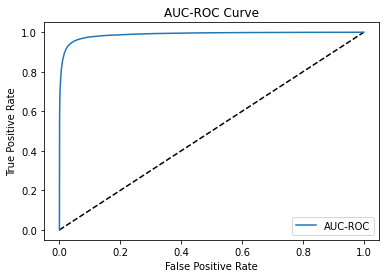

In [73]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AUC-ROC')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [74]:
auc_score = roc_auc_score(y_test,rfc.predict(x_test))
print(auc_score)

0.9535382025768411


AUC-ROC Score is 95.3%

## Saving the best Model

In [75]:
import joblib
joblib.dump(predy,"Micro_Credit_Defaulter.obj")

['Micro_Credit_Defaulter.obj']